<a href="https://colab.research.google.com/github/linkyouhj/heejae/blob/master/Advanced_%EC%84%9C%ED%9D%AC%EC%9E%AC_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from google.colab import drive
drive.mount('/gdrive/', force_remount=True)
%matplotlib inline
warnings.filterwarnings('ignore')




Mounted at /gdrive/


In [ ]:
path = '/gdrive/My Drive/CUAI/titanic'


#data import
train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')
gender_submission = pd.read_csv(path+'/gender_submission.csv')

train.info()
test.info()
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  



*   Survived: 생존여부(0,1)
*   Pclass: 티켓 클래스(1,2,3)
*   Sex: 성별(male,female)
*   Age: 나이
*   SibSp: 형제/배우자
*   Parch: 부모/자녀
*   Ticket: 티켓 번호
*   Fare: 요금
*   Cabin: 수하물 번호
*   Embarked: 선착장(C,Q,S)








In [ ]:

#sex를 numeric value로 수정
#male = 1, female = 0
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_clean'] = test['Sex'].astype('category').cat.codes

In [ ]:
train.info()
test.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_clean    891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(5)
memory usage: 84.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
train.isnull().sum()
#결측치
'''
Age: 177
Cabin: 687
Embarked: 2
'''

'\nAge: 177\nCabin: 687\nEmbarked: 2\n'

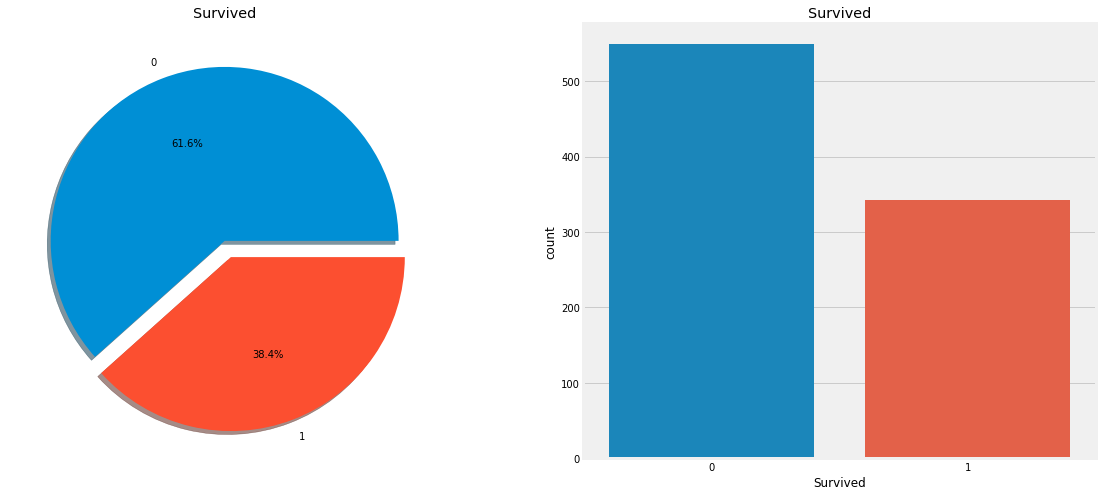

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

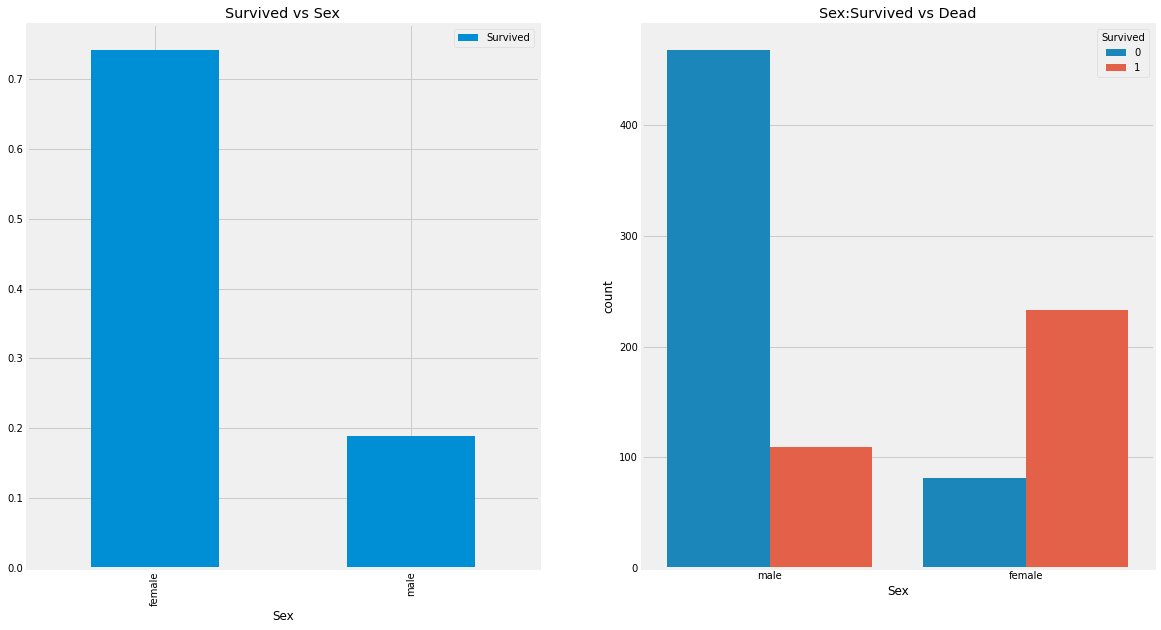

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,10))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data = train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

여성 승객이 더 적지만 여성의 생존 비율이 훨씬 높다

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


탑승한 클래스 기준(1등석, 2등석, 3등석)
비율상 1등석의 생존 비율이 가장 높고 2,3등석 순으로 낮아짐


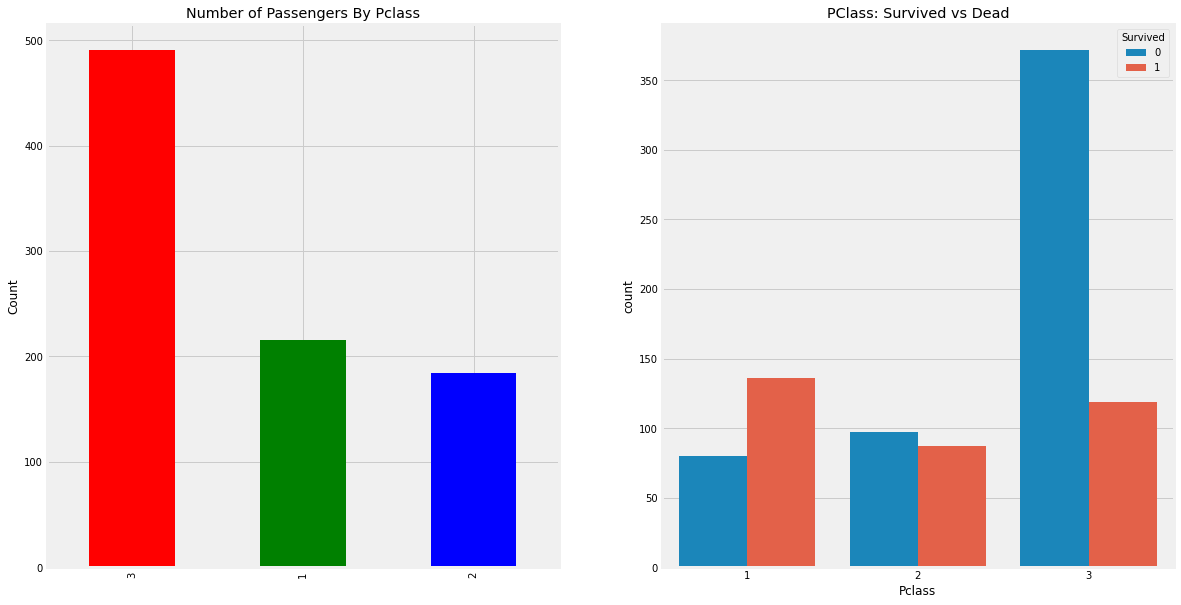

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,10))
train['Pclass'].value_counts().plot.bar(color=['red','green','blue'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('PClass: Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')


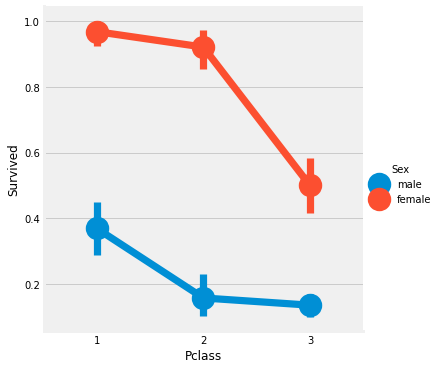

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex', data = train)
plt.show()

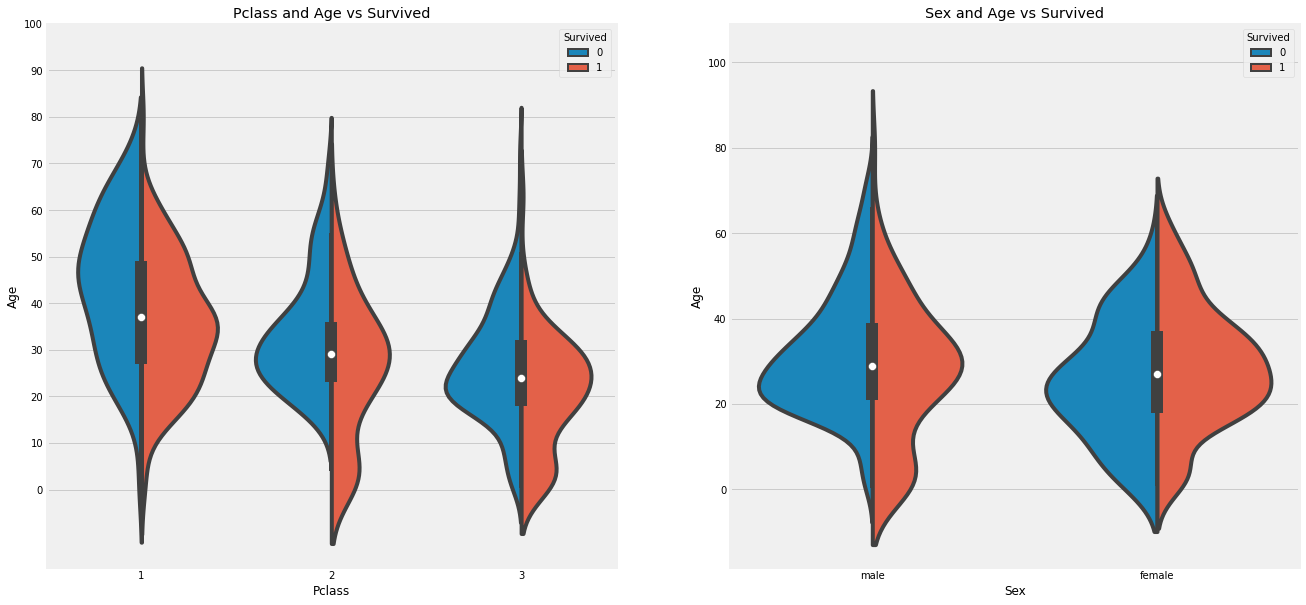

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.violinplot('Pclass','Age',hue='Survived', data = train, split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',split=True,data = train, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110),10)
plt.show()

나이와 생존 비율의 차이가 유의미함 -> 나이의 결측치가 171개나 되는데, 임의의 숫자로 집어 넣을 경우 예측에 영향이 생길 수 있음을 의미

In [ ]:
train['Initial']=0
for i in train:
  train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

test['Initial']=0
for i in test:
  test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

Mr.xxx
Mrs.xxx
Ms.xxx
와 같은 이름 앞의 호칭?을 분류함(Initial로)

In [ ]:
train['Initial'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Initial, dtype: object

In [ ]:
#train['Initial'].value_counts()
test['Initial'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Initial, dtype: int64

In [ ]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mrs','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)
test['Initial'].replace(['Rev','Col','Dr','Dona','Ms'],['Other','Other','Mr','Mr',"Miss"],inplace=True)

Mr, Miss, Mrs, Master, Other
다섯가지로 분류한다.
https://www.kaggle.com/ash316/eda-to-prediction-dietanic 
의 내용을 참고했다.

```
# 코드로 형식 지정됨
```



In [ ]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.662162
Mrs       36.205357
Other     45.888889
Name: Age, dtype: float64

각각의 initial에 따른 평균치의 나이로 결측치를 채워준다.

In [ ]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

test.loc[(train.Age.isnull())&(test.Initial=='Mr'),'Age']=33
test.loc[(train.Age.isnull())&(test.Initial=='Mrs'),'Age']=36
test.loc[(train.Age.isnull())&(test.Initial=='Master'),'Age']=5
test.loc[(train.Age.isnull())&(test.Initial=='Miss'),'Age']=22
test.loc[(train.Age.isnull())&(test.Initial=='Other'),'Age']=46

In [ ]:
train.Age.isnull().any(),test.Age.isnull().any()

(False, True)

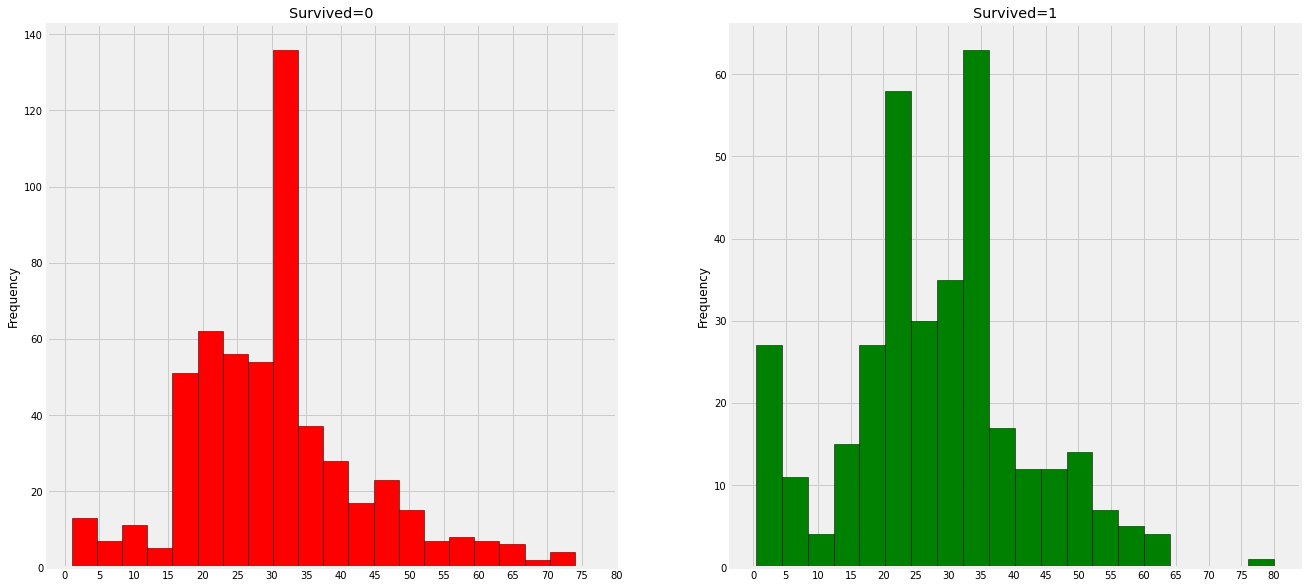

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

0~5세의 아이들과 
20~25세의 사람들의 생존율이 매우 높음
30~35세의 사람들이 사망자 수가 가장 많음

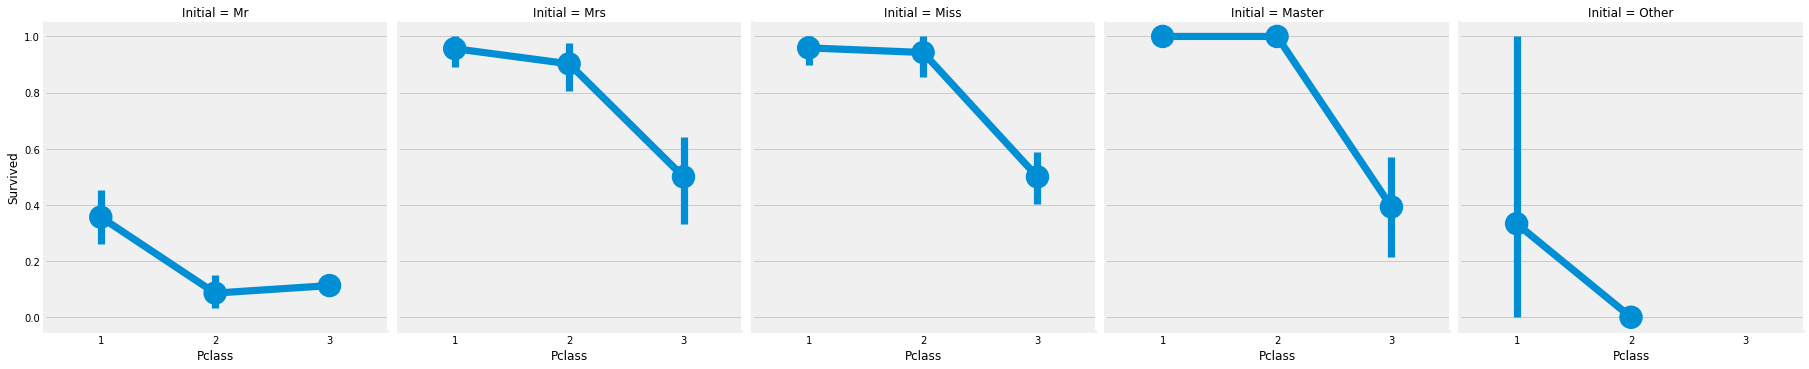

In [ ]:
sns.factorplot('Pclass','Survived',col='Initial',data=train)
plt.show()

여자와 아이들의 생존율은 pclass와 무관하게 높다.

In [ ]:
pd.crosstab([train.Embarked,train.Pclass],[train.Sex,train.Survived],margins=True).style.background_gradient(cmap='summer_r')

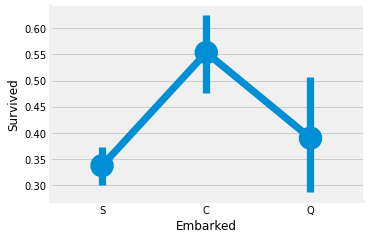

In [ ]:
sns.factorplot('Embarked','Survived',data = train)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Embarked 별로 생존율을 확인하면 C에서 embarked한 경우 가장 많이 살아남았다.(C Q S 순서)

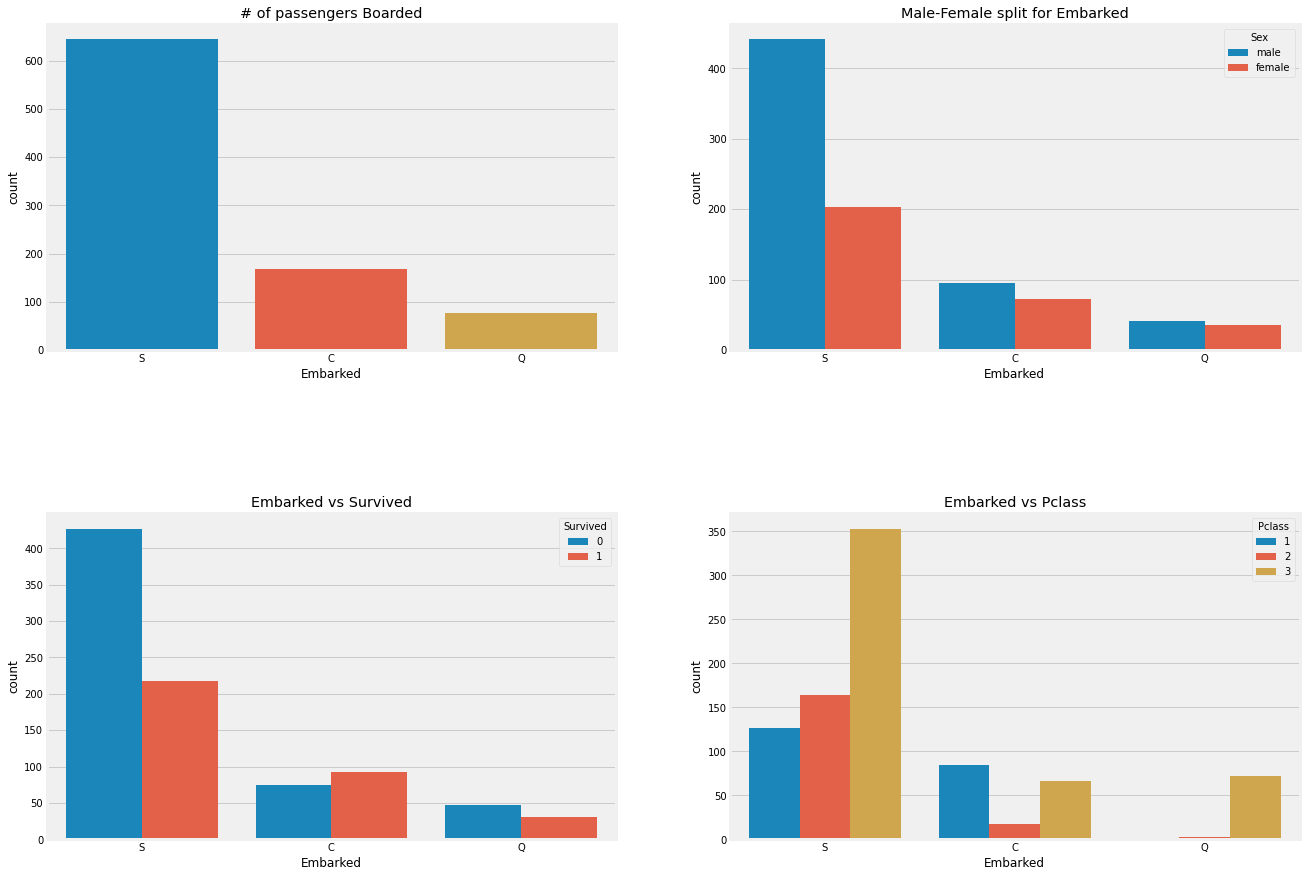

In [ ]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('# of passengers Boarded')

sns.countplot('Embarked',hue='Sex', data = train, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')

sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data = train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

S에서 가장 많이 탔고, 3 class의 비율이 대다수이다.
C에서의 승객의 생존율이 가장 높다. -> class3의 비율도 적고 여자의 비율도 많다
Q에서는 거의 대부분의 승객이 3class이다.

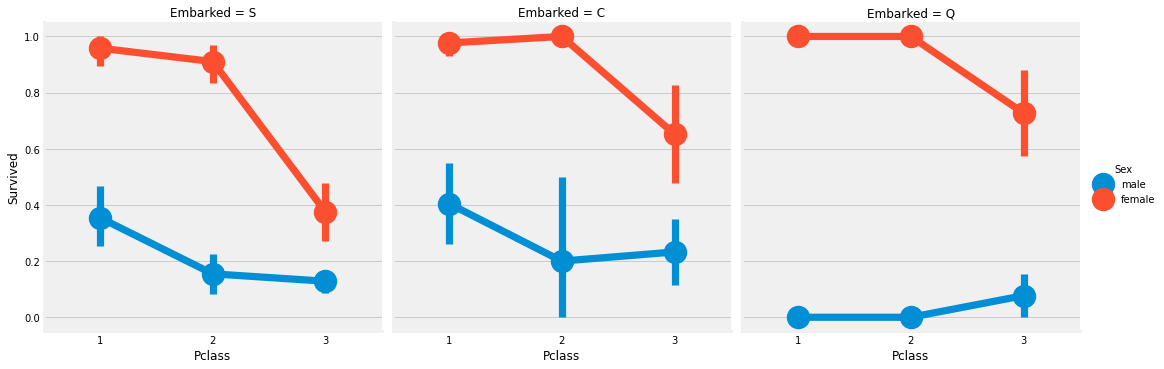

In [ ]:
sns.factorplot('Pclass','Survived',hue = 'Sex', col = 'Embarked',data = train)
plt.show()

1,2 class의 여성의 생존률은 embarked와 무관하게 매우 높다.
S embarked 에서의 3class는 남녀가 모두 매우 생존률이 낮다

In [ ]:
train['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)

대부분의 승객이 S 포트에서 왔으므로 결측치는 S로 채워준다.

In [ ]:
train.Embarked.isnull().any(),test.Embarked.isnull().any()

(False, False)

In [ ]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


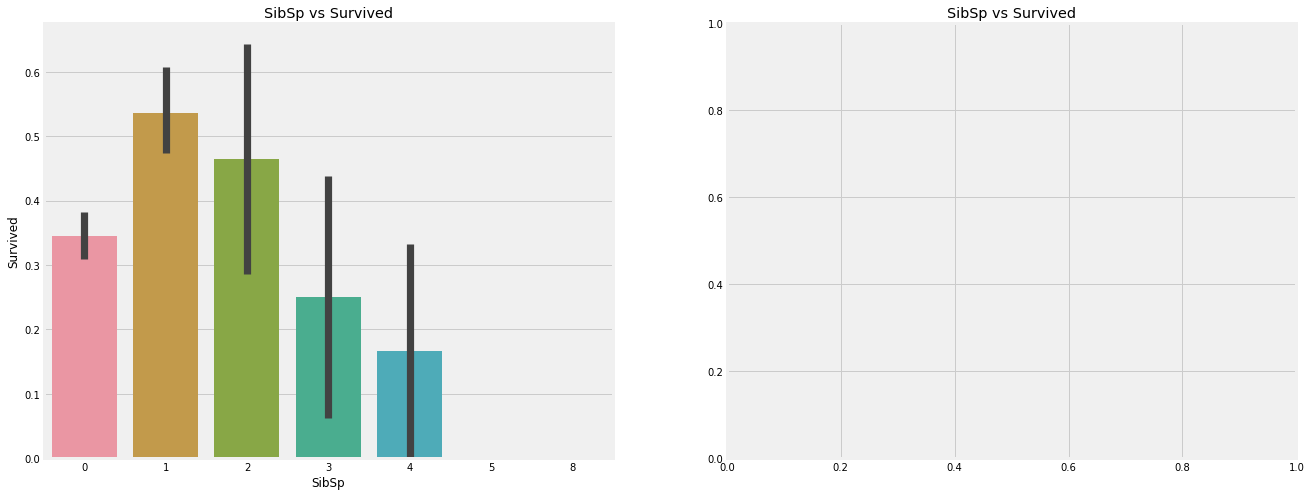

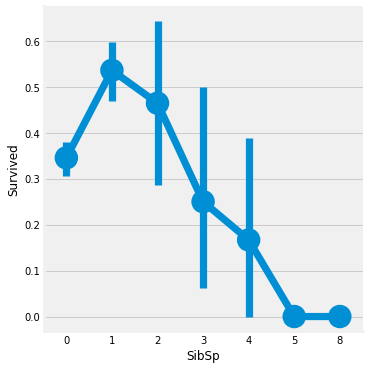

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=train,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

왜 이렇게 나오지,,,
뭐 아무튼 형제/배우자 수가 유의미한 생존율에 유의미한 차이를 보임

In [ ]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


혼자 탑승한 경우는 생존율이 35퍼 정도
한 명 이상의 형제/배우자와 함께 탑승한 경우 수가 늘어날 수록 가파르게 생존율이 줄어듦(55퍼~~)
5~8명이 함께 타면 생존율이 0인데, Pclass를 살펴보면 알 수 있듯이 4명 이상인 경우는 전부 3class이다.

In [ ]:
pd.crosstab(train.Parch, train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [ ]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


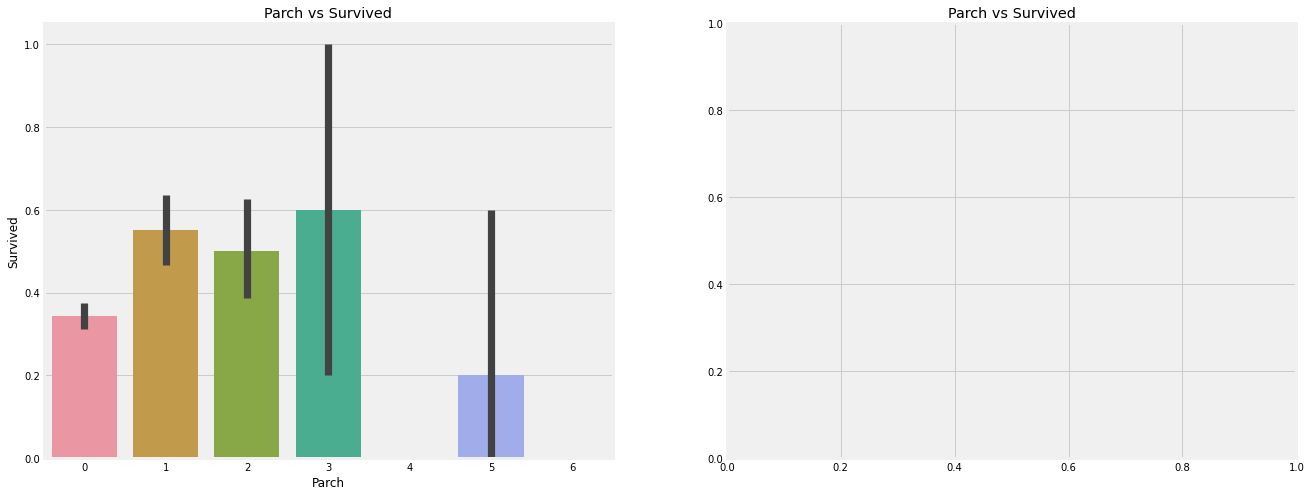

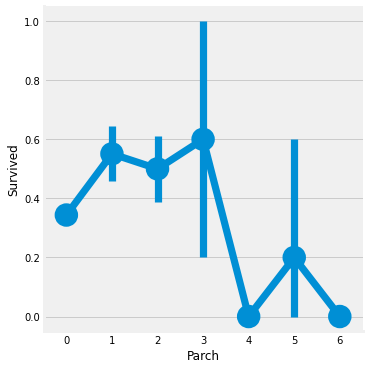

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')

#plt.close(2)
plt.show()

1~3명의 부모-자식 관계가 함께 탑승한 경우 생존율이 가장 높다.
더 늘어나면 떨어지고 혼자 있는 것도 떨어진다고 볼 수 있다.

In [ ]:
train['Fare'].max(),train['Fare'].min(),train['Fare'].mean()

(512.3292, 0.0, 32.2042079685746)

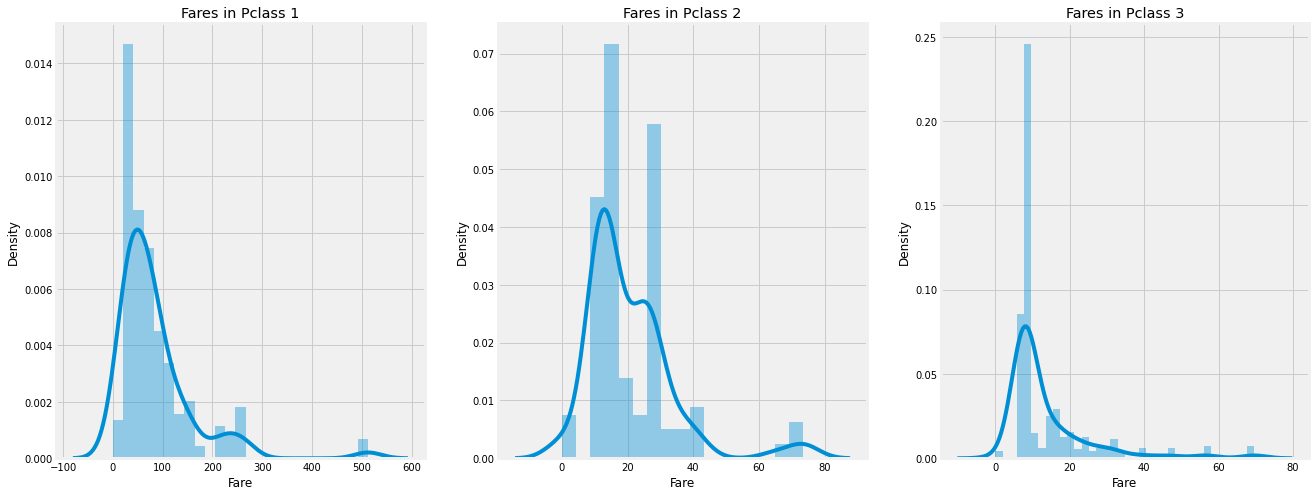

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

그래프는 비슷해보이지만 Fare의 범위가 크게 차이나는 것을 알 수 있다.
1class의 Fare가 2,3에 비해 훨씬 높다.

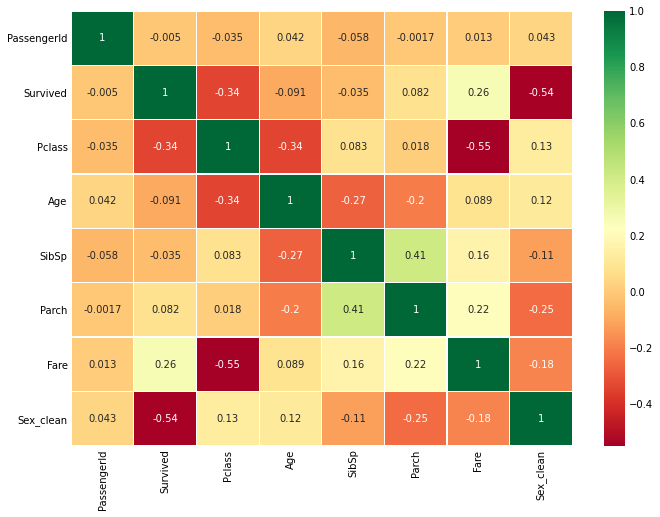

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

1에 가까울 수록 양의 연관이 있고 -1에 가까울 수록 음의 연관이 있다
양의 연관: A이면 B일 가능성이 높다.
음의 연관: A이면 B가 아닐 가능성이 높다.

In [ ]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head(2) 

test['Age_band']=0
test.loc[test['Age']<=16,'Age_band']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_band']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_band']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_band']=3
test.loc[test['Age']>64,'Age_band']=4
test.head(2) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs,2


나이는 연속적인 값이고 0~80까지의 나이를 하나하나 카테고리화할 수 없으므로 5개의 band로 나눠준다.

In [ ]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


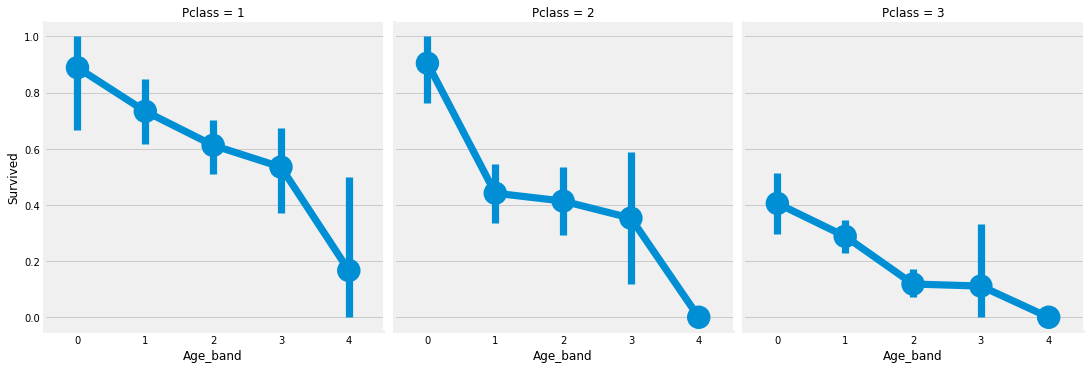

In [ ]:
sns.factorplot('Age_band','Survived',data = train, col='Pclass')
plt.show()

클래스와 무관하게 나이가 증가하면 생존율이 떨어진다

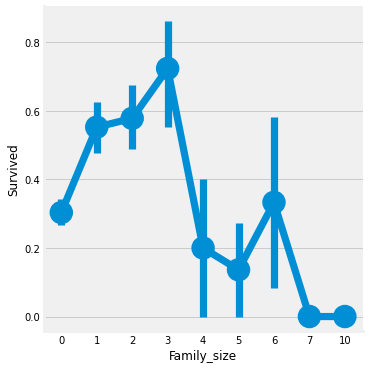

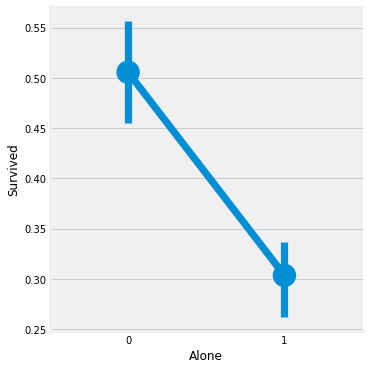

In [ ]:
train['Family_size']=0
train['Family_size']=train['Parch']+train['SibSp']
train['Alone']=0
train.loc[train.Family_size==0,'Alone']=1

test['Family_size']=0
test['Family_size']=test['Parch']+test['SibSp']
test['Alone']=0
test.loc[test.Family_size==0,'Alone']=1


f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_size','Survived',data=train,ax=ax[0])
ax[0].set_title('Family_size vs Survived')
sns.factorplot('Alone','Survived',data=train,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(0)
plt.close(1)
plt.show()

가족이 있을 때가 생존율이 더 높고,
3명을 넘어가면 급감한다.

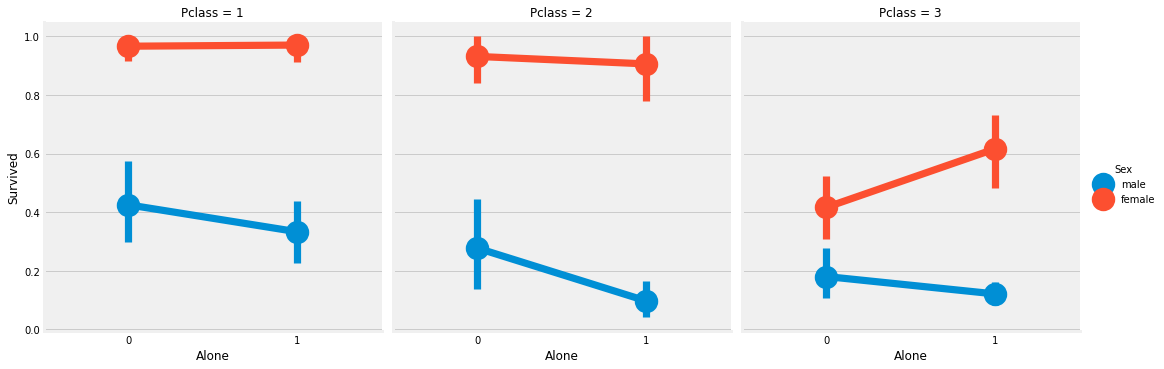

In [ ]:
sns.factorplot('Alone','Survived',data=train,hue='Sex',col='Pclass')
plt.show()

클래스 3의 여성들은 혼자 있을 때 생존율이 더 높다.
그 외에는 혼자보다 가족이 있을 때 생존율이 더 높음

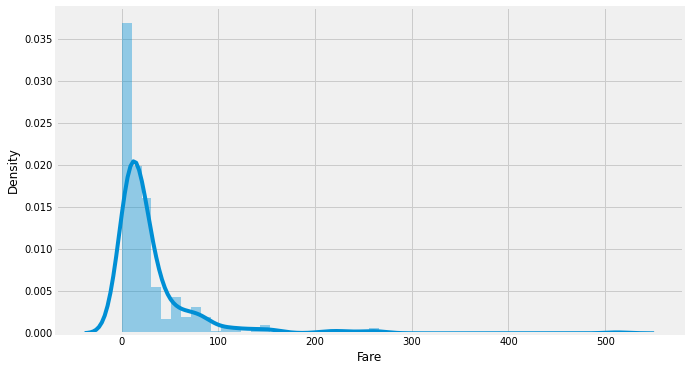

In [ ]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train["Fare"])

In [ ]:
'''
df_train["Log_Fare"] = np.log1p(train["Fare"]) 
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_train["Log_Fare"]) 
print("Skewness: {:.3f}".format(df_train["Log_Fare"].skew())) 
print("Kurtosis: {:.3f}".format(df_train["Log_Fare"].kurt()))
'''


'\ndf_train["Log_Fare"] = np.log1p(train["Fare"]) \nf, ax = plt.subplots(figsize = (10, 6)) \nsns.distplot(df_train["Log_Fare"]) \nprint("Skewness: {:.3f}".format(df_train["Log_Fare"].skew())) \nprint("Kurtosis: {:.3f}".format(df_train["Log_Fare"].kurt()))\n'

그냥 Fare는 분포가 매우 비대칭이다. 아웃라이어에 지나치게 민감하게 반응할 수 있다.
따라서 Fare에 log를 취해준다.

Skewness: 4.787
Kurtosis: 33.398


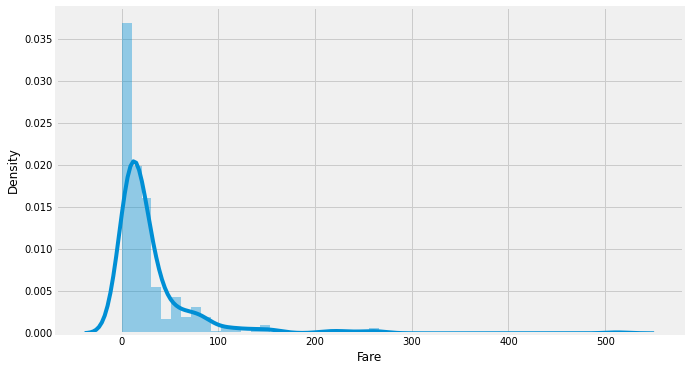

In [ ]:
train["Fare_log"] = np.log1p(train["Fare"]) 
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(train["Fare"]) 
print("Skewness: {:.3f}".format(train["Fare"].skew())) 
print("Kurtosis: {:.3f}".format(train["Fare"].kurt()))

test["Fare_log"] = np.log1p(test["Fare"]) 


In [ ]:

test['Fare_range']=pd.qcut(test['Fare_log'],4)
test.groupby(['Fare_range']).sum().style.background_gradient(cmap='summer_r')

train['Fare_range']=pd.qcut(train['Fare_log'],4)
train.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_range,
"(-0.001, 2.187]",0.197309
"(2.187, 2.738]",0.303571
"(2.738, 3.466]",0.454955
"(3.466, 6.241]",0.581081


fare이 증가하면 생존율이 증가한다.
Age_band처럼 수치화한다

In [ ]:
train['Fare_cat']=0
train.loc[train['Fare_log']<=2.2,'Fare_cat']=0
train.loc[(train['Fare_log']>2.2)&(train['Fare_log']<=2.8),'Fare_cat']=1
train.loc[(train['Fare_log']>2.8)&(train['Fare_log']<=3.5),'Fare_cat']=2
train.loc[(train['Fare_log']>3.5)&(train['Fare_log']<=6.3),'Fare_cat']=3

test['Fare_cat']=0
test.loc[test['Fare_log']<=2.2,'Fare_cat']=0
test.loc[(test['Fare_log']>2.2)&(test['Fare_log']<=2.8),'Fare_cat']=1
test.loc[(test['Fare_log']>2.8)&(test['Fare_log']<=3.5),'Fare_cat']=2
test.loc[(test['Fare_log']>3.5)&(test['Fare_log']<=6.3),'Fare_cat']=3

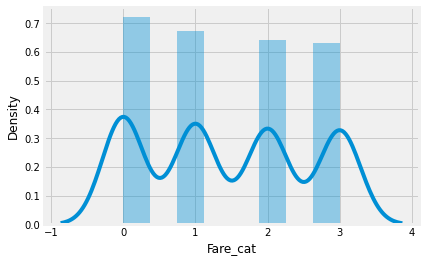

In [ ]:
#sns.factorplot('Fare_cat','Survived',data=train,hue='Sex')
sns.distplot(train["Fare_cat"]) 
plt.show()

In [ ]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)



In [ ]:
test['Sex'].replace(['male','female'],[0,1],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [ ]:
train.info()
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  Sex_clean    891 non-null    int8    
 13  Initial      891 non-null    int64   
 14  Age_band     891 non-null    int64   
 15  Family_size  891 non-null    int64   
 16  Alone        891 non-null    int64   
 17  Fare_log     891 non-null    float64 
 18  Fare_range   891 non-null    c

train set에서 의미 없는 카테고리들을 drop out한다.PassenferId, Ticket, Name은 생존율과 무관한 수치이므로 필요 없다.
Other은 어디서 생긴거지,,,
Sex는 Sex_clean으로
Age는 Age_band로
Fare,Fare_range 대신 Fare_cat을 사용
Cabin은 null 값이 지나치게 많기 때문에 사용하지 않는다.
Initial,Embarked은 string을 numeric value로 변경해준다.

In [ ]:
train.drop(['PassengerId','Ticket','Name','Sex','Age','Fare','Fare_range','Fare_log','Cabin','Initial'],axis=1,inplace=True)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   SibSp        891 non-null    int64
 3   Parch        891 non-null    int64
 4   Embarked     891 non-null    int64
 5   Sex_clean    891 non-null    int8 
 6   Age_band     891 non-null    int64
 7   Family_size  891 non-null    int64
 8   Alone        891 non-null    int64
 9   Fare_cat     891 non-null    int64
dtypes: int64(9), int8(1)
memory usage: 63.6 KB


In [ ]:
test.drop(['PassengerId','Ticket','Name','Sex','Age','Fare','Fare_range','Fare_log','Cabin','Initial'],axis=1,inplace=True)


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Pclass       418 non-null    int64
 1   SibSp        418 non-null    int64
 2   Parch        418 non-null    int64
 3   Embarked     418 non-null    int64
 4   Sex_clean    418 non-null    int8 
 5   Age_band     418 non-null    int64
 6   Family_size  418 non-null    int64
 7   Alone        418 non-null    int64
 8   Fare_cat     418 non-null    int64
dtypes: int64(8), int8(1)
memory usage: 26.7 KB


In [ ]:
df_train = train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
dtrain,dtest=train_test_split(train,test_size=0.2,random_state=0,stratify=train['Survived'])
dtrain_x=dtrain[dtrain.columns[1:]]
dtrain_y=dtrain[dtrain.columns[:1]]

dtest_x=dtest[dtest.columns[1:]]
dtest_y=dtest[dtest.columns[:1]]

X=train[train.columns[1:]]
Y=train['Survived']



In [ ]:
model = RandomForestClassifier(n_estimators=200)
model.fit(dtrain_x,dtrain_y)
prediction=model.predict(dtest_x)
print('The accuracy is : ',metrics.accuracy_score(prediction,dtest_y))

The accuracy is :  0.7821229050279329


In [ ]:
'''
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1000,100)
hyper={'n_estimators': n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
'''

"\nfrom sklearn.model_selection import GridSearchCV\nn_estimators=range(100,1000,100)\nhyper={'n_estimators': n_estimators}\ngd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)\ngd.fit(X,Y)\nprint(gd.best_score_)\nprint(gd.best_estimator_)\n"

logistic regression


In [ ]:

y=df_train['Survived']
x=df_train.drop(['Survived'],1)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x,y,random_state=30,test_size=0.3)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr=LogisticRegression(C=1.0,intercept_scaling=1,random_state=None)

In [ ]:
best_score = 0
for i in [0.001,0.01,0.1,1,10,100]:
  lr = LogisticRegression(C=i,intercept_scaling=1,random_state=None)

  lr.fit(X_train,Y_train)
  pred_valid=lr.predict(X_valid)
  score=(pred_valid==Y_valid).mean()
  print('C= ',i,'  //    score: ',score)

  if score>best_score:
    best_score=score
    best_parameter = {'C':i, 'intercept_scaling':1, 'random_state':None}


C=  0.001   //    score:  0.5970149253731343
C=  0.01   //    score:  0.7388059701492538
C=  0.1   //    score:  0.8134328358208955
C=  1   //    score:  0.7873134328358209
C=  10   //    score:  0.7910447761194029
C=  100   //    score:  0.7910447761194029


In [ ]:
lr=LogisticRegression(**best_parameter)
lr.fit(X_train,Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#pred_train=model.predict(X_valid)

model.fit(X_train, Y_train)
pred_train = model.predict(X_train)
print('train_score : ', (pred_train == Y_train).mean())
pred_valid = model.predict(X_valid)
print('valid_score : ', (pred_valid == Y_valid).mean())


train_score :  0.9020866773675762
valid_score :  0.8134328358208955


In [ ]:
df_test = test
from pandas import Series
feature_importance = model.feature_importances_
Series_feat_imp=Series(feature_importance,index=df_test.columns)

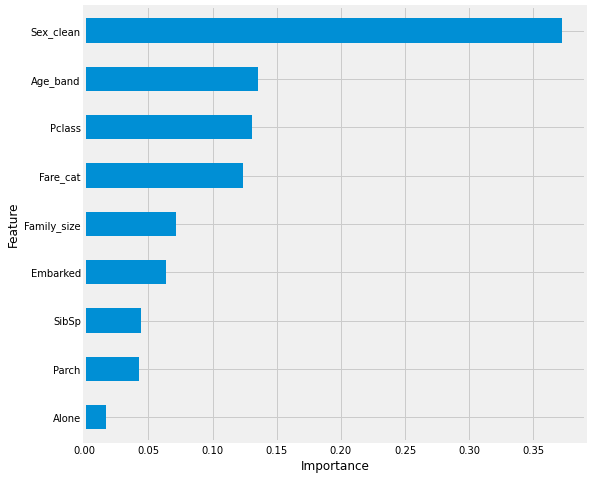

In [ ]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#print('The accuracy is : ',metrics.accuracy_score(prediction,Y_valid))

In [ ]:
pred_test=lr.predict(test)

In [ ]:
gender_submission['Survived'] = pred_test

In [ ]:
gender_submission.to_csv('submission_final.csv',index=False)